In [5]:
pip install numpy==2.0.2

  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stg 0.1.2 requires lifelines, which is not installed.
causalml 0.15.5 requires lightgbm, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pyreadstat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

# Setting the random seed for reproducibility
np.random.seed(42)
# Assuming you've already read your SPSS file into 'df'
# Make sure to include 'EID' when reading the data
# Path to your SPSS file

df, meta = pyreadstat.read_sav('/Users/evonwong/Library/CloudStorage/OneDrive-TheEducationUniversityofHongKong/Evon/UKBB/Clustering/SDOH_UK_UKBB_ENGonly.sav')

# Displaying the first few rows of the dataframe
print(df.head())

# Optionally, inspect the metadata
print(meta.variable_value_labels)  # Shows value labels for categorical variables

         EID Date_Attend_Assess Date_Home_location_before_intake  \
0  1000016.0         2008-11-29                       1999-02-02   
1  1000029.0         2009-11-05                       1979-07-08   
2  1000033.0         2008-01-17                       1987-11-09   
3  1000045.0         2008-09-19                       2005-06-01   
4  1000051.0         2007-08-23                       1998-10-06   

   East_coordinate  North_coordinate  East_North_coordinate  \
0         430000.0          567000.0  POINT (430000 567000)   
1         343000.0          148000.0  POINT (343000 148000)   
2         387000.0          350000.0  POINT (387000 350000)   
3         357000.0          170000.0  POINT (357000 170000)   
4         449000.0          189000.0  POINT (449000 189000)   

  LSOA_Datazone_code_2011   LSOA_Datazone_name_2011 Datzone_name_2011  \
0               E01008574       North Tyneside 029C                     
1               E01029148            Sedgemoor 003C               

In [2]:

# Selecting columns needed for analysis
columns_needed = ["EID",
# Census_High_Skill_Employment
"Census_High_Skill_Employment_rev",
# Census_Managers_Directors_Senior_Officials
"Census_Managers_Directors_Senior_Officials_rev",
# Census_Professional
"Census_Professional_rev",
# Census_Associate_Professional
"Census_Associate_Professional_rev",
"IMD_2010_Employmen",
# ONS_Net_Weekly_Income
"ONS_Net_Weekly_Income_rev",
# Census_Economically_Active
"Census_Economically_Active_rev",
"Census_Economically_Inactive",
# "IMD_2010_Income",
"IMD_2010_Income_IDACI",
"IMD_2010_Income_IDAOPI",
"Census_No_Adults_Employment",
#######SDOH_EDUCATION_DOMAIN##############
"Census_No_Qualification",
# "IMD_2010_Education",
"IMD_2010_Children_Young_People",
"IMD_Skills",
"IMD_Not_Staying_on_in_Edu",
"IMD_Not_Enter_Higher_Edu",
########### SDOH_HEALTH_DOMAIN###############
"PHP_Winter_Mortality",
"Census_Comm_Estab",
"Census_Disability",
# "IMD_Health",
"IMD_Potential_Life_Lost",
"IMD_Comparative_Illness_Disability",
"IMD_Acute_Morbidity",
"IMD_Mood_Anxiety",
########### SDOH_NEIGHBORHOOD_BUILD_ENVIRONMENT#######
"Census_Avg_Household_Size",
"Census_No_Central_Heating",
"Census_Pop_Density",
"Census_No_Car_Vans",
# "DT_Traffic",
# "IMD_Living_Environment",
"IMD_Air_quality",
"IMD_Traffic_Accident",
"IMD_NO2",
"IMD_PM",
"IMD_SO2",
"IMD_Benzene",
"Greenspace_1000m_rev",
# "Greenspace_300m_rev",
"Natural_Enviro_1000m_rev",
# "Natural_Enviro_300m_rev",
"NO2_2010",
"PM10_2010",
"PM2.5_2010",
# "IMD_Barriers",
"IMD_Wider_Barriers",
"IMD_Geographical_Barriers",
"IMD_Affordability_indicator",
"IMD_Distance_GP_indicator",
"IMD_Distance_Food_Shop",
"IMD_Distance_Primary_School",
"IMD_Distance_Post_Office",
###############SDOH_SOCIAL_AND_COMMUNITY_CONTEXT###################
"PHP_Violent_Crime",
"IMD_2010_Crime_Disorder",
"Census_Ethnic_Groups",
# "ONS_2010_population_18",
"ONS_2010_population_18_p",
# "ONS_2010_population_65",
"ONS_2010_population_65_p",
# "ONS_2011_population_18",
# "ONS_2011_population_18_p",
# "ONS_2011_population_65",
# "ONS_2011_population_65_p",
"PHP_Smoking_Prevalence",
# "Census_Household_Deprivation",
"Census_Limited_English_Proficiency",
"Census_Single",
"PHP_Suicide",
"PHP_Self_Harm"]


df = df[columns_needed]

# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

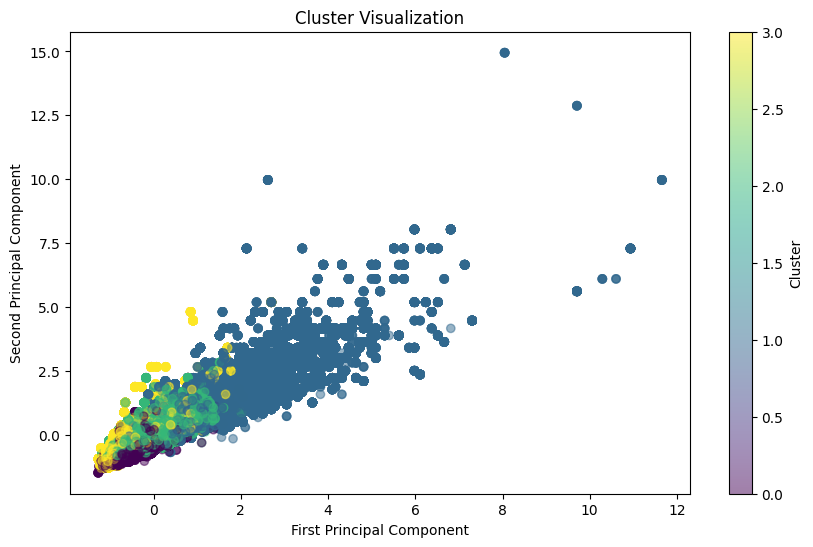

In [ ]:

# Exclude rows with more than 70% missing values
# threshold = len(df.columns) * 0.7
# df = df.dropna(thresh=threshold)

# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

# Imputation using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_for_clustering)

# Scaling the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster results to the dataframe
df['Cluster'] = clusters

# Plotting the cluster results (example with the first two columns, adjust as needed)
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

save_path = '/Users/evonwong/Downloads/08102025 all sample SDOH clustering sensitivity analysis missing value.sav'
pyreadstat.write_sav(df, save_path)

In [3]:
import pandas as pd
import pyreadstat
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume df is already loaded

# Exclude rows with more than 70% missing values
# threshold = len(df.columns) * 0.7
# df = df.dropna(thresh=threshold)

# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

# Imputation using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_for_clustering)

# Scaling the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Convert scaled data to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_for_clustering.columns)

# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster results to the scaled dataframe
df_scaled['Cluster'] = clusters

# Optionally, you can add back the EID if necessary for identification
df_scaled['EID'] = df['EID'].values


# Save the DataFrame with scaled data and clusters
save_path = '/Users/evonwong/Downloads/20251008 all SDOH clustering sensitivity analysis scaled and clustered.sav'
pyreadstat.write_sav(df_scaled, save_path)

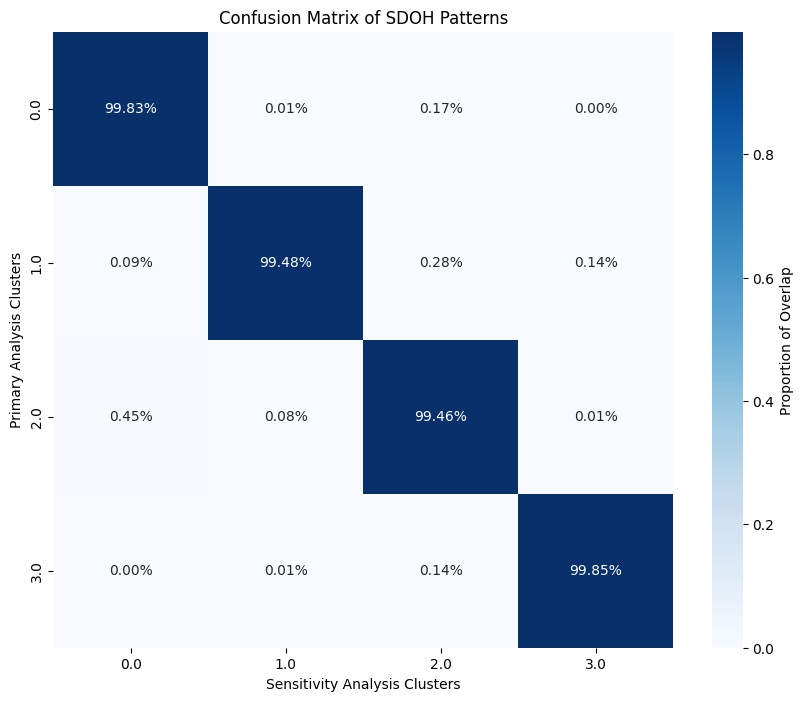

In [5]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the datasets
primary_path = '/Users/evonwong/Downloads/26 June UKBB_SDOH_kmeancluster_data_k4_updatedvariables.sav'
sensitivity_path = '/Users/evonwong/Library/CloudStorage/OneDrive-TheEducationUniversityofHongKong/Evon/UKBB/Clustering/Draft 1/Draft 1 revised/20251008 all SDOH clustering sensitivity analysis scaled and clustered.sav'

# Load the datasets
primary_df, primary_meta = pyreadstat.read_sav(primary_path)
sensitivity_df, sensitivity_meta = pyreadstat.read_sav(sensitivity_path)

# Assuming 'Cluster_k4_v2_recode' is the cluster variable for both datasets
# Ensure EID is set as the index if not already
primary_df.set_index('EID', inplace=True)
sensitivity_df.set_index('EID', inplace=True)

# Filter both dataframes to include only the cluster columns
primary_clusters = primary_df[['Cluster_k4_v2_recode']]
sensitivity_clusters = sensitivity_df[['Cluster_k4_v2_recode']]

# Merge the datasets on EID
comparison_df = primary_clusters.join(sensitivity_clusters, lsuffix='_primary', rsuffix='_sensitivity')

# Clean any NaN values that arise from non-overlapping EIDs
comparison_df.dropna(inplace=True)

# Create a confusion matrix
confusion_matrix = pd.crosstab(
    comparison_df['Cluster_k4_v2_recode_primary'],
    comparison_df['Cluster_k4_v2_recode_sensitivity'],
    normalize='index'  # Normalize by rows to show proportions
)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Proportion of Overlap'})
plt.title('Confusion Matrix of SDOH Patterns')
plt.xlabel('Sensitivity Analysis Clusters')
plt.ylabel('Primary Analysis Clusters')
# Save the plot as a high-resolution PDF file
plt.savefig('/Users/evonwong/Downloads/20251008Confusion_Matrix_SDOH_Patterns.pdf', dpi=1200, format='pdf')
plt.show()